In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from spandas import preprocessing as pr
from spandas import plots as pt

In [2]:
df = pd.read_excel("Data_RLMS.xlsx")
df

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,0,0,0,0,0,0,0,0,1,0
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,1,0,0,0,1,0,0,0,1,0
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,0,0,0,0,0,0,0,0,0,1
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,2,...,0,1,0,0,0,0,0,0,0,1
3867,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,2,...,0,0,0,1,0,0,0,0,0,0
3868,56986,Московская о,Село,32,1,"ЛЕГКАЯ, ПИЩЕ",11.362930,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3869,57005,г. Москва,Областной це,19,1,"СПОРТ, ТУРИЗ",12.461540,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.loc[3869].loc['id39':'id47']

id39    1
id40    1
id41    0
id42    0
id43    0
id44    0
id45    0
id46    0
id47    0
Name: 3869, dtype: object

In [15]:
df['children'].value_counts()

children
2    1333
1    1325
0     903
3     247
4      44
5      10
6       5
7       4
Name: count, dtype: int64

In [ ]:
exc = ['internet', 'male', 'idind', 'urban']

In [42]:
clean_df, deleted = pr.data_preprocessing(df, logging=pr.Loggs(was_became=False))

 ____         _              _              _                _         
/ ___|   ___ | |  ___   ___ | |_   ___   __| |   ___   ___  | | ___  _ 
\___ \  / _ \| | / _ \ / __|| __| / _ \ / _` |  / __| / _ \ | |/ __|(_)
 ___) ||  __/| ||  __/| (__ | |_ |  __/| (_| | | (__ | (_) || |\__ \ _ 
|____/  \___||_| \___| \___| \__| \___| \__,_|  \___| \___/ |_||___/(_)
                                                                       


idind | age | male | lnwage | public | internet | children | urban | educ | id1 | id2 | id3 | id4 | id5 | id6 | id7 | id8 | id9 | id10 | id11 | id12 | id13 | id14 | id15 | id16 | id17 | id18 | id19 | id20 | id21 | id22 | id23 | id24 | id25 | id26 | id27 | id28 | id29 | id30 | id31 | id32 | id33 | id34 | id35 | id36 | id37 | id38 | id39 | id40 | id41 | id42 | id43 | id44 | id45 | id46 | id47 | id48 | id49 | id50 | id51 | id52 | id53 | id54 | id55 | id56 | id57 | id58 | id59 | id60 | id61 | id62 | id63 | id64 | id65 | id66 | id67 | id68 | id69 | id70 | id71 | id

In [11]:
deleted['children']

{'count': 6, 'deleted': {609: 6, 1528: 7, 1529: 7, 2182: 6, 2582: 6, 3610: 6}}

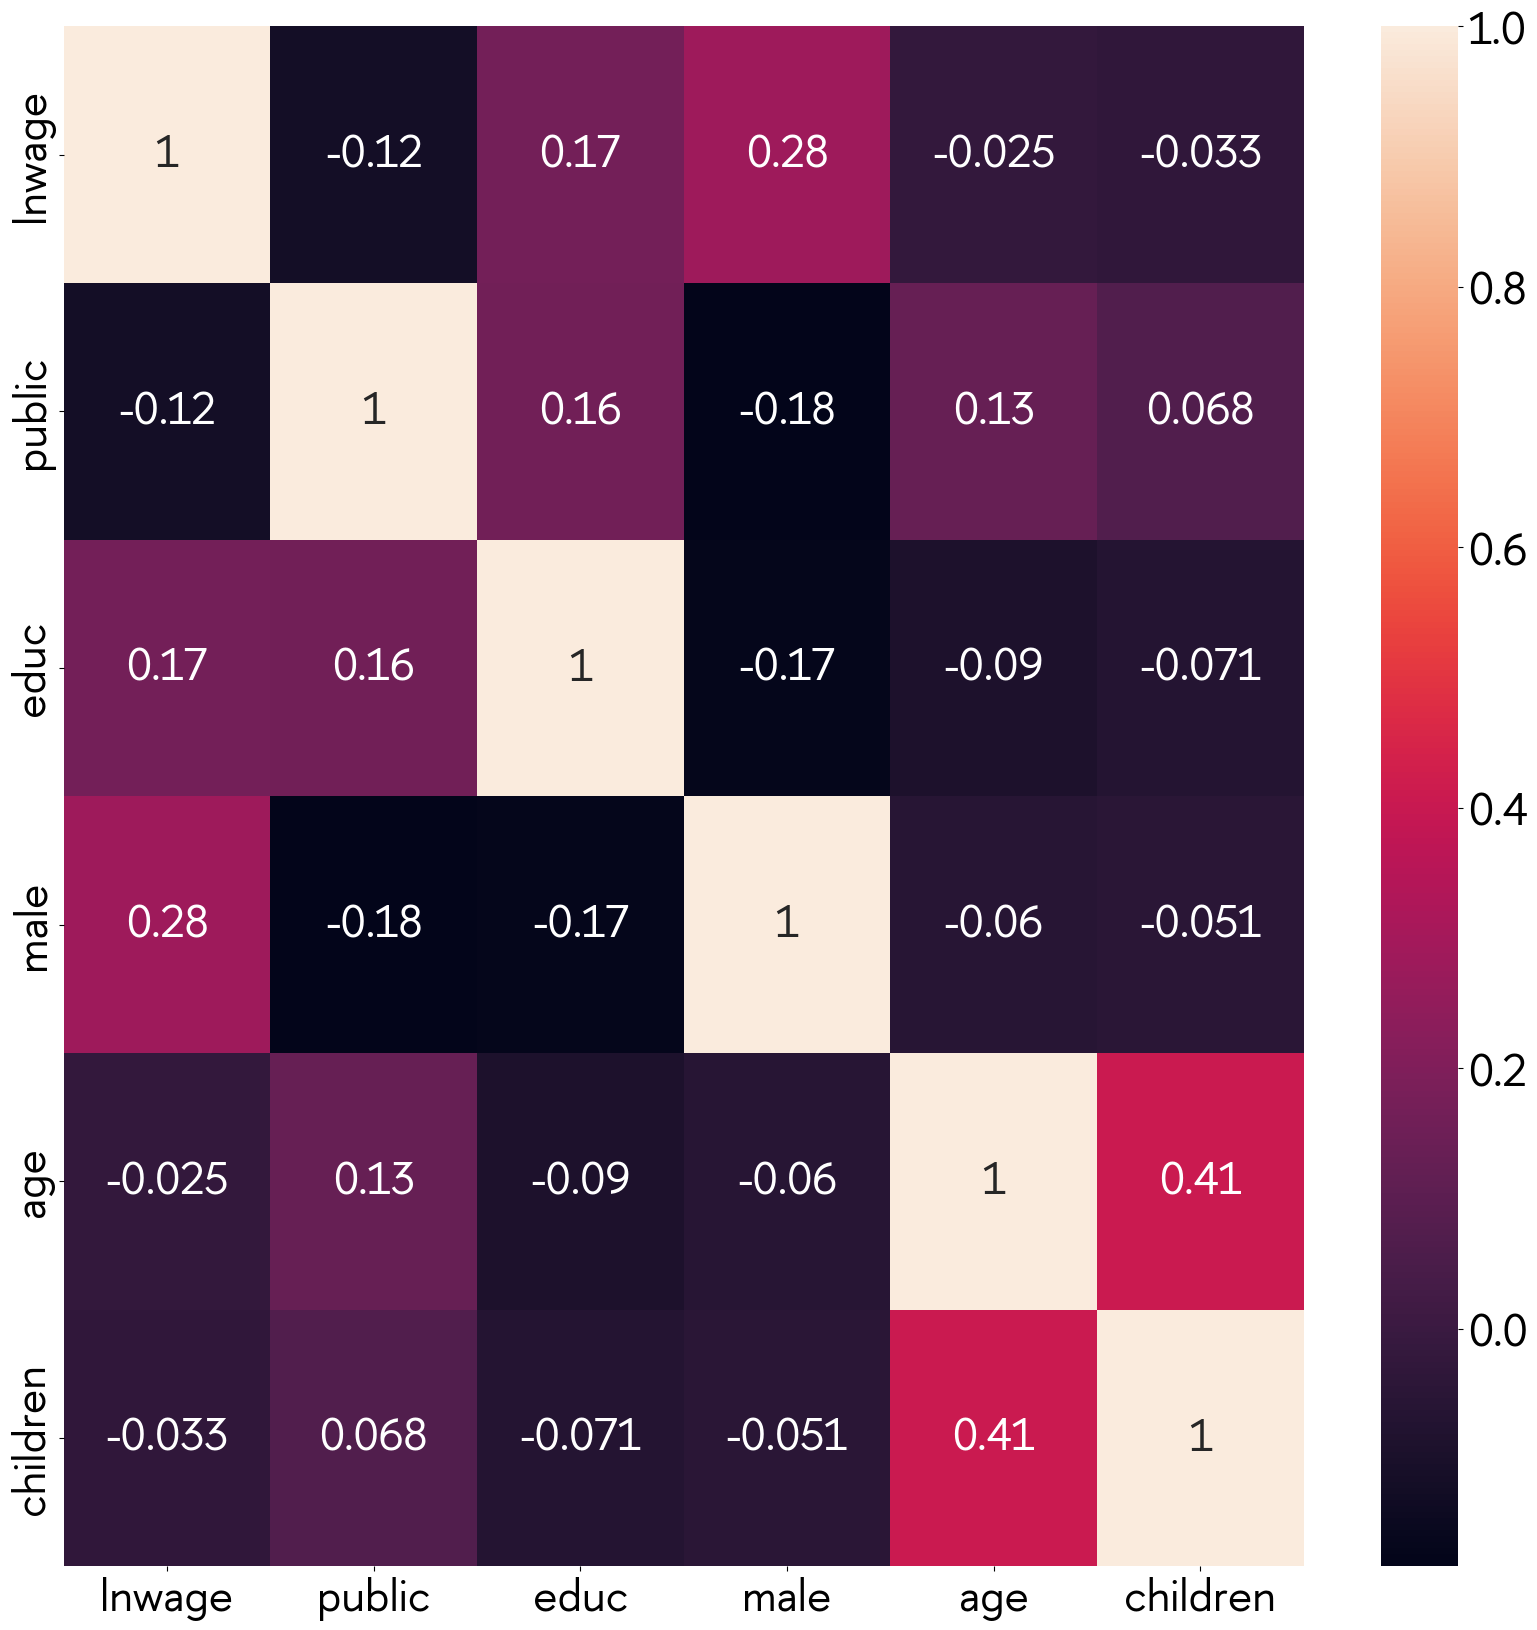

c:\Users\Vex1cK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Vex1cK\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


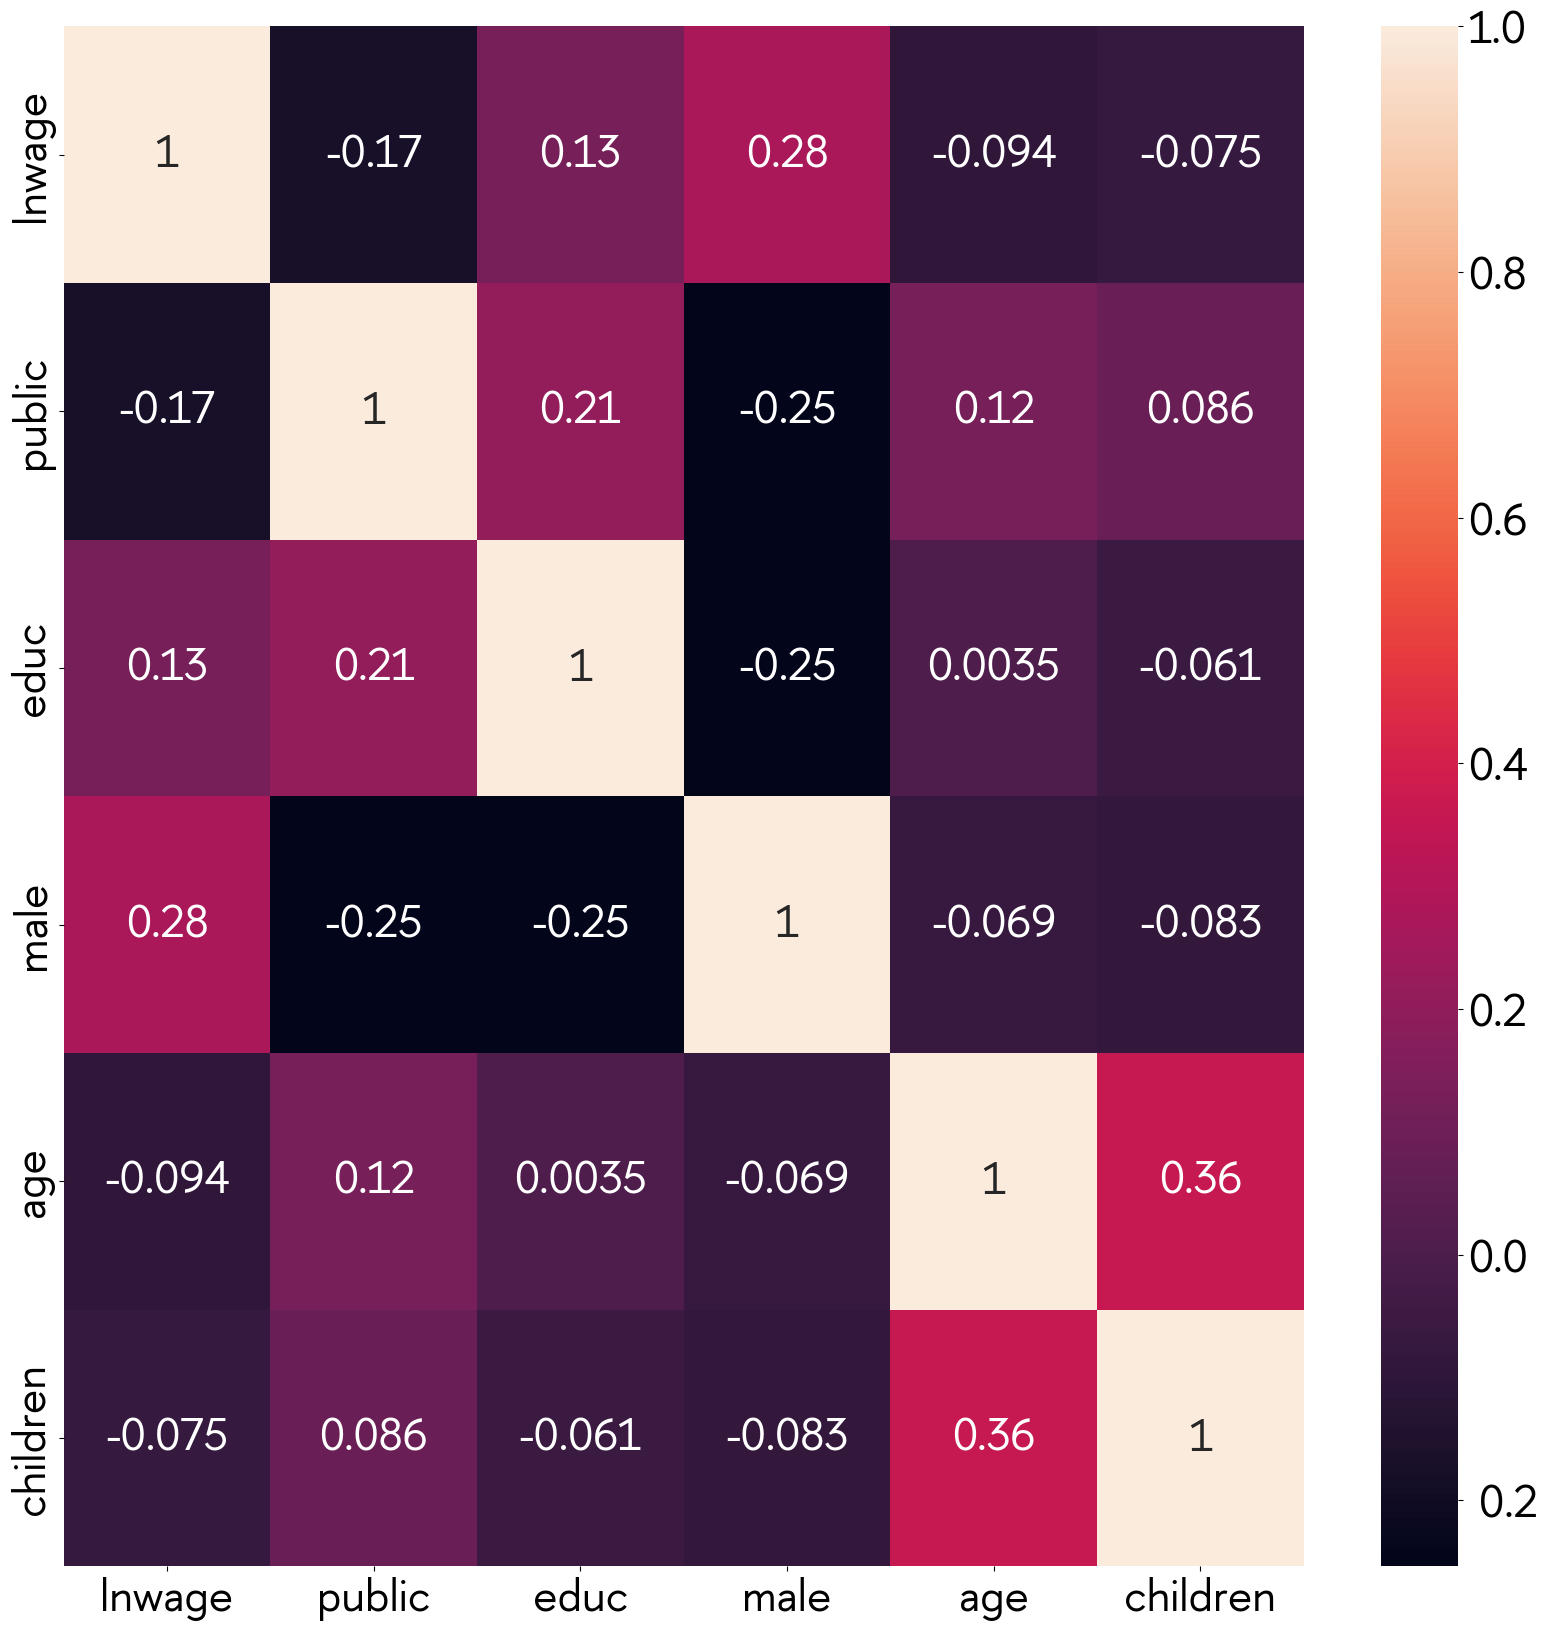

In [44]:

plt.figure(figsize=(20, 20))
sns.heatmap(df[df['urban'] == 1][['lnwage', 'public', 'educ', 'male', 'age', 'children']].corr(), annot=True)
plt.show()
plt.figure(figsize=(20, 20))
sns.heatmap(df[df['urban'] == 0][['lnwage', 'public', 'educ', 'male', 'age', 'children']].corr(), annot=True)
plt.show()

In [45]:
df.groupby("educ")['lnwage'].describe()

,count,mean,std,min,25%,50%,75%,max
educ,,,,,,,,
0,321.0,9.612920,0.698076,3.700147,9.200102,9.648127,10.05359,11.13978
1,1104.0,9.691855,0.678648,3.762023,9.281476,9.753487,10.15895,11.54525
2,1063.0,9.707655,0.607730,3.762023,9.322705,9.753487,10.15895,12.46154
3,1383.0,9.998936,0.808553,3.762023,9.617092,10.053590,10.44663,12.79801


In [16]:
bdf = pd.read_csv("df_extended.csv")
bdf

,Unnamed: 0,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,...,id72,id73,id74,id75,vj1.1.2,vj1.1.3,vj1.1.4,vj62,vj63,vj64
0,0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,...,0,0,1,0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,"И ДА, И НЕТ",СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,3.0,2.0,5.0
1,1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,...,0,0,1,0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,7.0,7.0,7.0
2,2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,...,0,0,0,1,СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ,СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,4.0,3.0,5.0
3,3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,...,0,0,0,1,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,5.0,3.0,8.0
4,4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,...,0,0,1,0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,6.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,3864,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,...,0,0,0,1,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,3.0,2.0,5.0
3865,3865,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,...,0,0,0,0,СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,2.0,2.0,3.0
3866,3866,56986,Московская о,Село,32,1,"ЛЕГКАЯ, ПИЩЕ",11.362930,0,1,...,1,0,0,0,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,4.0,4.0,6.0
3867,3867,57005,г. Москва,Областной це,19,1,"СПОРТ, ТУРИЗ",12.461540,0,1,...,0,0,0,0,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,5.0,7.0,7.0


In [5]:
from math import e

In [17]:
bdf['salary'] = bdf['log_wage'].apply(lambda x: e ** x)

In [18]:
bdf['salary'].describe()

count      3869.000000
mean      22592.450585
std       17851.017400
min          40.453251
25%       12910.626359
50%       18074.872625
75%       27542.622696
max      361497.353620
Name: salary, dtype: float64

In [19]:
bdf_clear = pr.remove_outliers(bdf, columns=['salary'])

In [20]:
bdf_clear.shape

(3648, 95)

In [21]:
bdf_clear['salary'].describe()

count     3648.000000
mean     19586.190805
std      10113.348850
min         40.453251
25%      12049.916386
50%      17214.150017
75%      25821.170592
max      49318.769122
Name: salary, dtype: float64

In [22]:
from spandas.utils import is_float

In [23]:
def a123(series: pd.Series):
    series_without_strings = series.copy(deep=True)
    if series.dtype not in ['float64', 'int64']:
        series_without_strings = series[series.apply(lambda x: is_float(str(x)))] \
            .astype("float64")
    q05 = series_without_strings.quantile(0.025)
    q95 = series_without_strings.quantile(0.975)
    return ~series.apply(lambda x: (q05 <= float(x) <= q95
                                    if is_float(str(x)) else True))

In [25]:
bdf_clear2 = bdf[~sum(a123(bdf[col]) for col in ['salary']).astype(bool)]

In [26]:
bdf_clear2['salary'].describe()

count     3679.000000
mean     21200.891724
std      11589.620066
min       5164.243995
25%      12910.626359
50%      18074.872625
75%      25821.170592
max      61109.951241
Name: salary, dtype: float64

In [28]:
deleted_salary = ~sum(a123(bdf[col]) for col in ['salary']).astype(bool)

In [29]:
deleted_salary.to_json("deleted_salary.json")

In [30]:
import json

In [36]:
with open("deleted_salary.json") as deld:
    deld = pd.Series(json.load(deld))

In [43]:
deld.shape

(3869,)

In [41]:
bdf.shape

(3869, 95)

In [52]:

clear_df45 = bdf[deld.tolist()]

In [53]:
clear_df45

,Unnamed: 0,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,...,id73,id74,id75,vj1.1.2,vj1.1.3,vj1.1.4,vj62,vj63,vj64,salary
0,0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,...,0,1,0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,"И ДА, И НЕТ",СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,3.0,2.0,5.0,7746.372901
1,1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,...,0,1,0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,7.0,7.0,7.0,41314.136148
2,2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,...,0,0,1,СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ,СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,4.0,3.0,5.0,30985.356472
3,3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,...,0,0,1,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,5.0,3.0,8.0,17214.150017
4,4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,...,0,1,0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,6.0,5.0,6.0,25821.170592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,3861,56966,г. Санкт-Пет,Областной це,33,0,"ТОРГОВЛЯ, БЫ",10.158950,0,1,...,0,0,1,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,5.0,6.0,6.0,25821.170592
3862,3862,56970,г. Санкт-Пет,Областной це,32,1,"ТОРГОВЛЯ, БЫ",10.669780,0,1,...,0,0,1,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,3.0,3.0,8.0,43035.472652
3863,3863,56976,Московская о,Село,37,1,"ЛЕГКАЯ, ПИЩЕ",10.313100,0,1,...,0,0,0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,4.0,3.0,7.0,30124.678544
3864,3864,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,...,0,0,1,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,3.0,2.0,5.0,22378.366725
